In [1]:
import os
import json
import datetime
import numpy as np

filenames = [dset for dset in os.listdir() if 'datelist' in dset]

def get_data(dataset):
    process = lambda x: (datetime.datetime.strptime(x[0],'%Y-%m-%d'),int(x[1].strip(' ')))
    data = []
    with open(dataset,'r') as file:
        for line in file:
            item = line.strip('\n').split(',')
            data.append(process(item))
    return np.array(data)

In [2]:
wapo = get_data(filenames[0])

Max date 2018-05-07 00:00:00 Min date 1977-04-20 00:00:00
Max date 2018-05-03 00:00:00 Min date 1996-11-08 00:00:00
Max date 2018-05-04 00:00:00 Min date 1986-01-30 00:00:00
Max date 2018-05-07 00:00:00 Min date 1865-04-15 00:00:00
Max date 2018-05-03 00:00:00 Min date 1886-08-20 00:00:00


Text(0.5,59,'Publication Date')

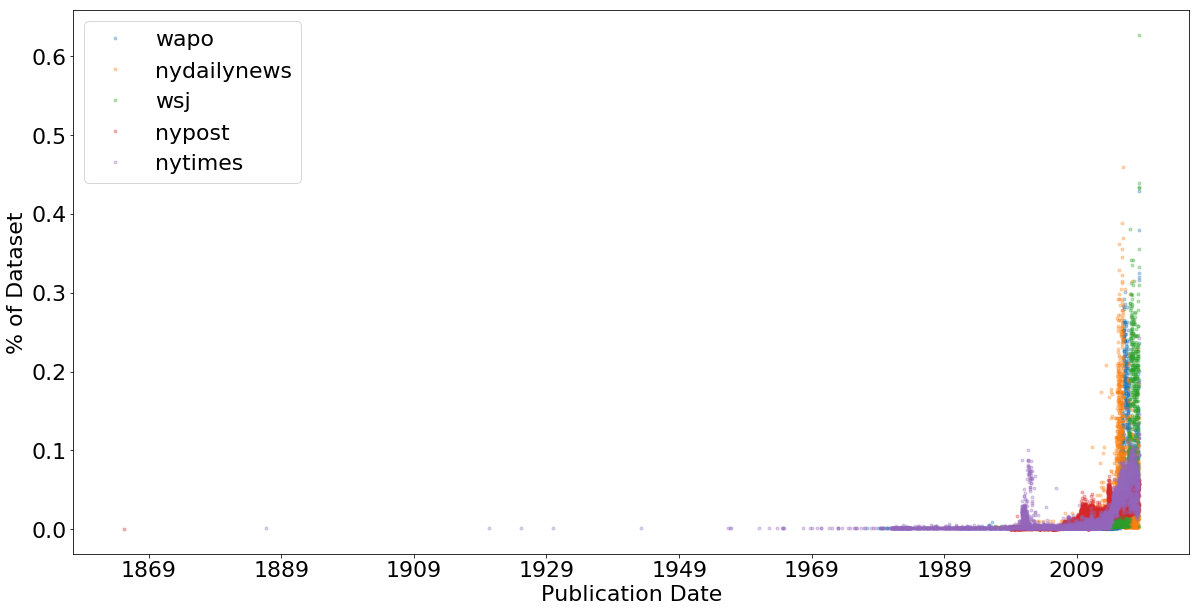

In [14]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
for file in filenames:
    data = get_data(file)
    print("Max date %s Min date %s" % (str(max(data[:,0])),str(min(data[:,0]))))
    plt.plot(data[:,0],100*data[:,1]/sum(data[:,1]),'.',alpha = 0.3)
    
plt.legend([name.replace('_datelist.csv','') for name in filenames],fontsize=22)
plt.savefig('pubdates_all.png')
plt.ylabel('% of Dataset')
plt.xlabel('Publication Date')

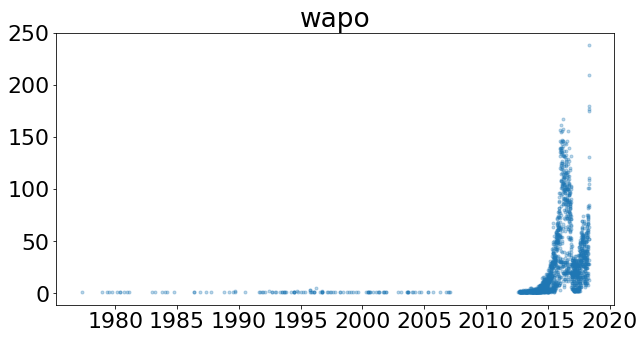

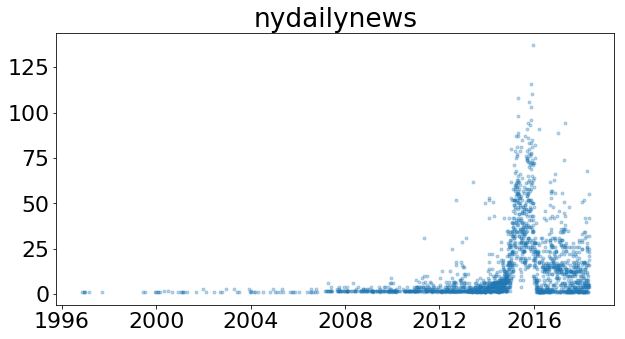

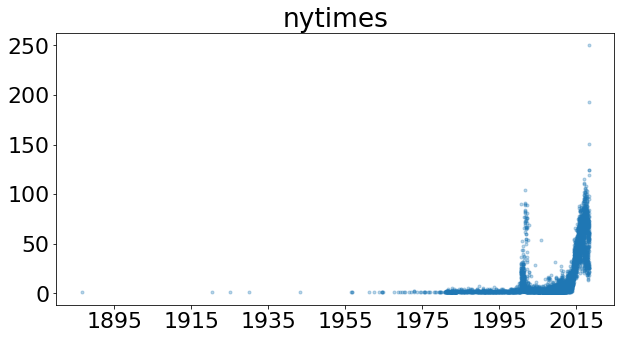

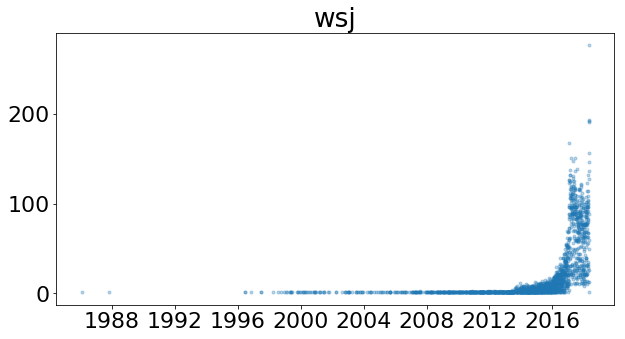

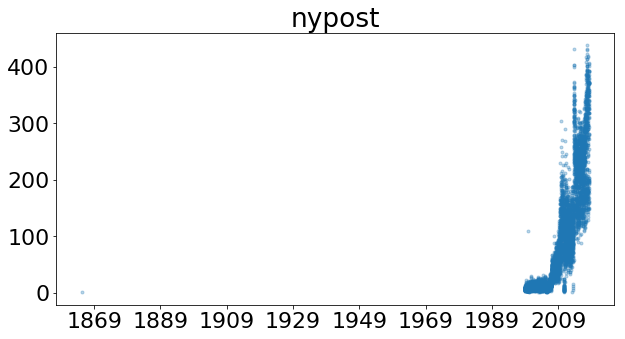

In [10]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 22})


for file in filenames:
    data = get_data(file)
    plt.figure(figsize=(10,5))
    plt.plot(data[:,0],data[:,1],'.',alpha = 0.3)
    plt.title(file.replace('_datelist.csv',''))
    plt.savefig('pubdates_'+file.replace('_datelist.csv',''+'.png'))

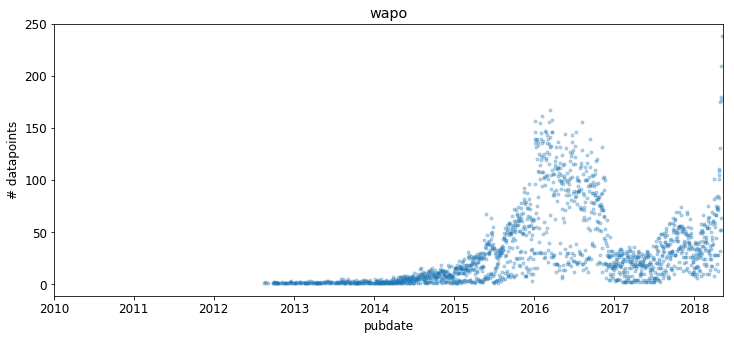

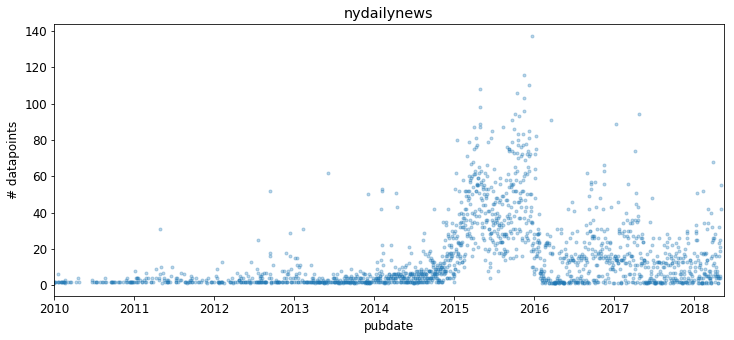

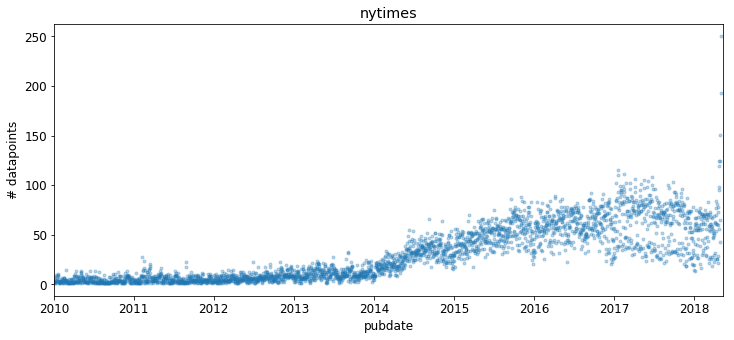

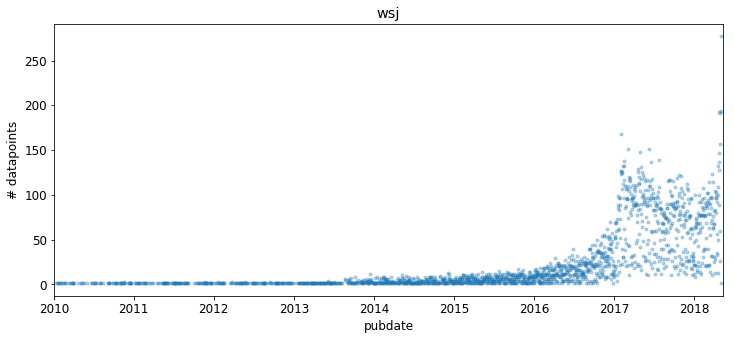

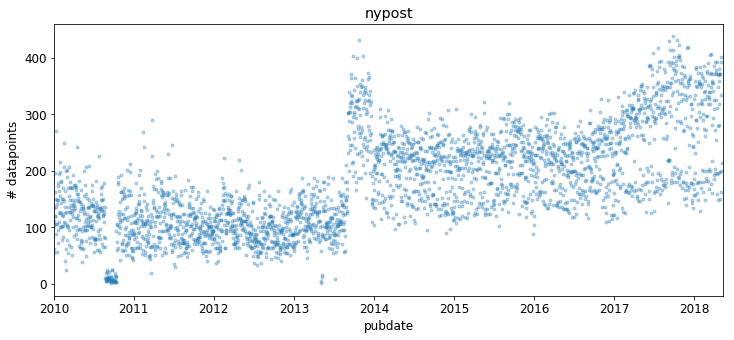

In [22]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 12})


for file in filenames:
    data = get_data(file)
    plt.figure(figsize=(12,5))
    plt.plot(data[:,0],data[:,1],'.',alpha = 0.3)
    plt.xlim([datetime.datetime(2010,1,1),datetime.datetime(2018,5,15)])
    plt.title(file.replace('_datelist.csv',''))
    plt.savefig('pubdates_xlimited'+file.replace('_datelist.csv',''+'.png'))
    plt.ylabel('# datapoints')
    plt.xlabel('pubdate')

In [4]:
! pip install matplotlib

    100% |████████████████████████████████| 13.7MB 703kB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 736kB/s ta 0:00:01
    100% |████████████████████████████████| 512kB 1.3MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 4.4MB/s ta 0:00:01


Max date 2018-05-07 00:00:00 Min date 1977-04-20 00:00:00
Max date 2018-05-03 00:00:00 Min date 1996-11-08 00:00:00
Max date 2018-05-04 00:00:00 Min date 1986-01-30 00:00:00
Max date 2018-05-07 00:00:00 Min date 1865-04-15 00:00:00
Max date 2018-05-03 00:00:00 Min date 1886-08-20 00:00:00


Text(0.5,59,'Publication Date')

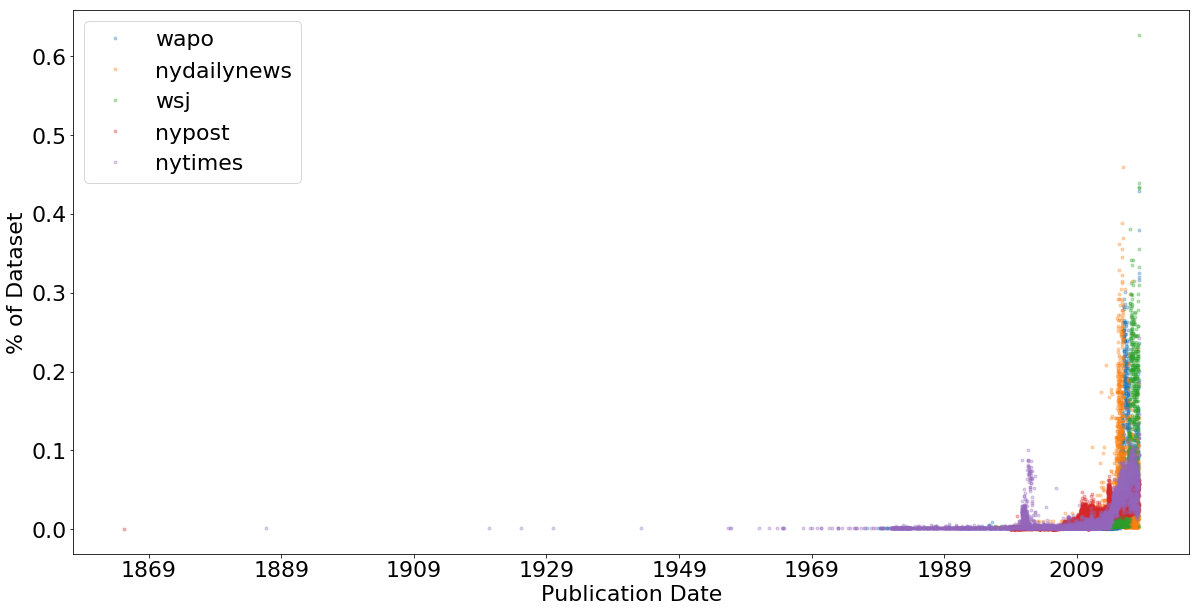

In [15]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
for file in filenames:
    data = get_data(file)
    print("Max date %s Min date %s" % (str(max(data[:,0])),str(min(data[:,0]))))
    plt.plot(data[:,0],100*data[:,1]/sum(data[:,1]),'.',alpha = 0.3)
    
plt.legend([name.replace('_datelist.csv','') for name in filenames],fontsize=22)
plt.savefig('pubdates_all.png')
plt.ylabel('% of Dataset')
plt.xlabel('Publication Date')

In [16]:
filenames

['wapo_datelist.csv',
 'nydailynews_datelist.csv',
 'wsj_datelist.csv',
 'nypost_datelist.csv',
 'nytimes_datelist.csv']

Max date 2018-05-07 00:00:00 Min date 1886-08-20 00:00:00
Max date 2018-05-07 00:00:00 Min date 1865-04-15 00:00:00


Text(0.5,59,'Publication Date')

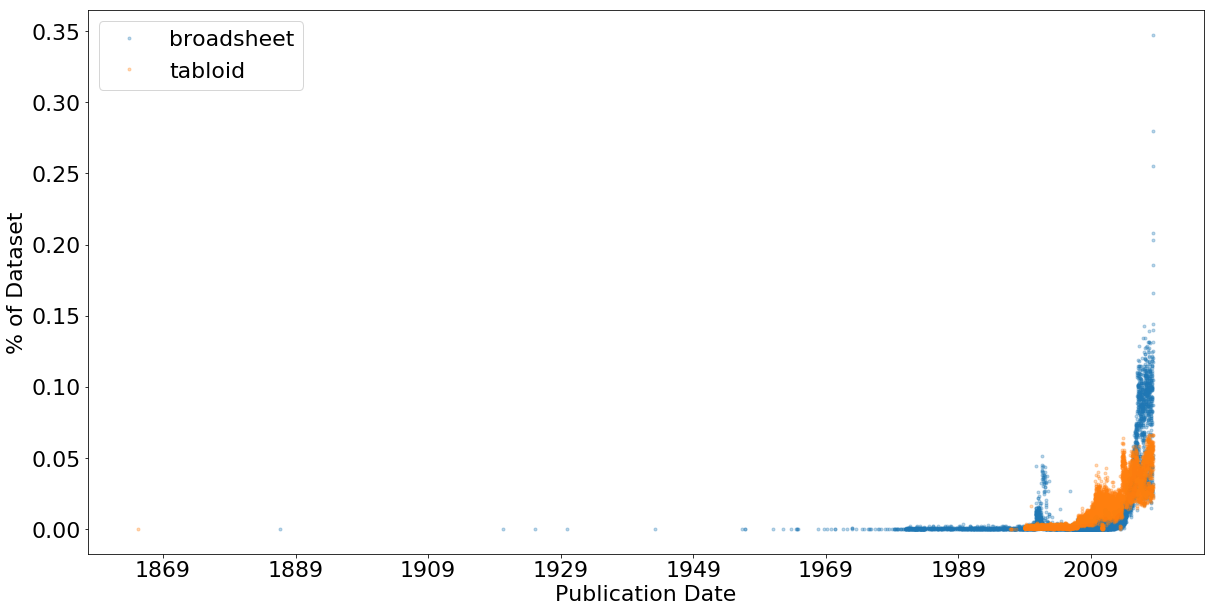

In [48]:
def merge(*args):
    # too lazy to use defaultdict ugh so hungry
    x_dict = dict()
    for i in args[0]:
        x_dict[i[0]] = i[1]
    
    for y in args[1:]:
            for i in y:
                if i[0] in x_dict:
                    x_dict[i[0]] = x_dict[i[0]] + i[1]
                else:
                    x_dict[i[0]] = i[1]
    
    return np.array(list(x_dict.items()))

broadsheet = merge(*[get_data(file) for file in ['wapo_datelist.csv','wsj_datelist.csv','nytimes_datelist.csv']])
tabloid = merge(*[get_data(file) for file in ['nypost_datelist.csv','nydailynews_datelist.csv']])

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
for data in [broadsheet,tabloid]:
    print("Max date %s Min date %s" % (str(max(data[:,0])),str(min(data[:,0]))))
    plt.plot(data[:,0],100a*data[:,1]/sum(data[:,1]),'.',alpha = 0.3)
    
plt.legend(['broadsheet','tabloid'],fontsize=22)
plt.savefig('pubdates_all.png')
plt.ylabel('% of Dataset')
plt.xlabel('Publication Date')

Max date 2018-05-07 00:00:00 Min date 1886-08-20 00:00:00
Max date 2018-05-07 00:00:00 Min date 1865-04-15 00:00:00


Text(0.5,59,'Publication Date')

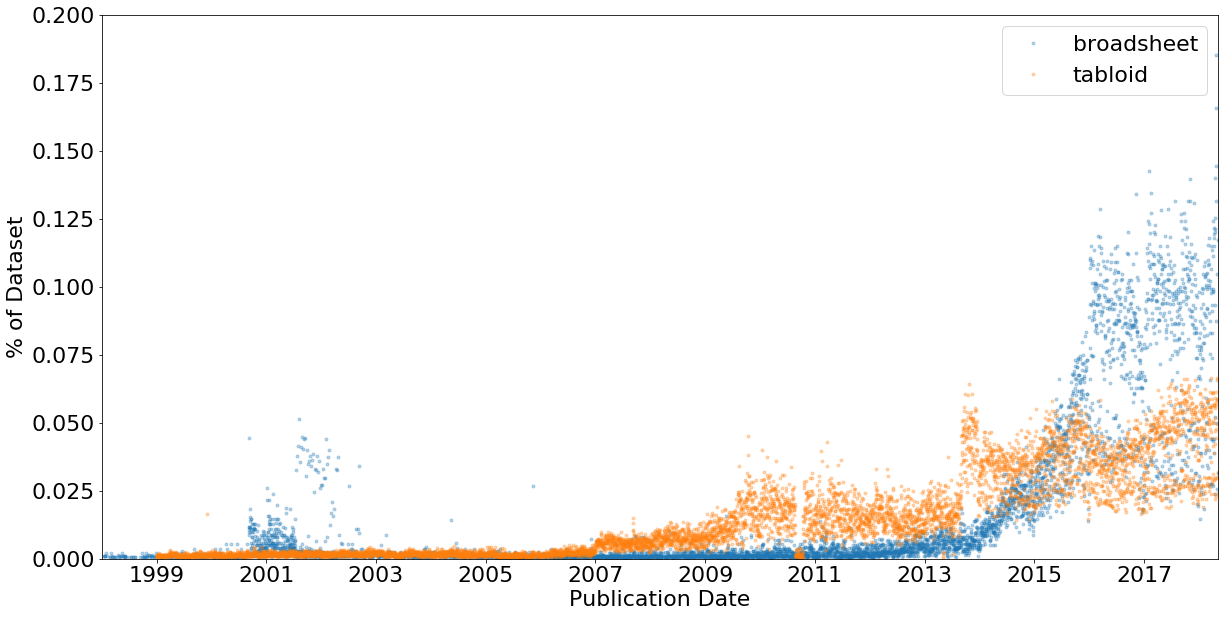

In [59]:
def merge(*args):
    # too lazy to use defaultdict ugh so hungry
    x_dict = dict()
    for i in args[0]:
        x_dict[i[0]] = i[1]
    
    for y in args[1:]:
            for i in y:
                if i[0] in x_dict:
                    x_dict[i[0]] = x_dict[i[0]] + i[1]
                else:
                    x_dict[i[0]] = i[1]
    
    return np.array(list(x_dict.items()))

broadsheet = merge(*[get_data(file) for file in ['wapo_datelist.csv','wsj_datelist.csv','nytimes_datelist.csv']])
tabloid = merge(*[get_data(file) for file in ['nypost_datelist.csv','nydailynews_datelist.csv']])

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
for data in [broadsheet,tabloid]:
    print("Max date %s Min date %s" % (str(max(data[:,0])),str(min(data[:,0]))))
    plt.plot(data[:,0],100*data[:,1]/sum(data[:,1]),'.',alpha = 0.3)
    
plt.xlim([datetime.datetime(1998,1,1),datetime.datetime(2018,5,7)])
plt.ylim([0,0.2])
plt.legend(['broadsheet','tabloid'],fontsize=22)
plt.savefig('pubdates_tb_axislimited.png')
plt.ylabel('% of Dataset')
plt.xlabel('Publication Date')

Max date 2018-05-07 00:00:00 Min date 1865-04-15 00:00:00


Text(0.5,59,'Publication Date')

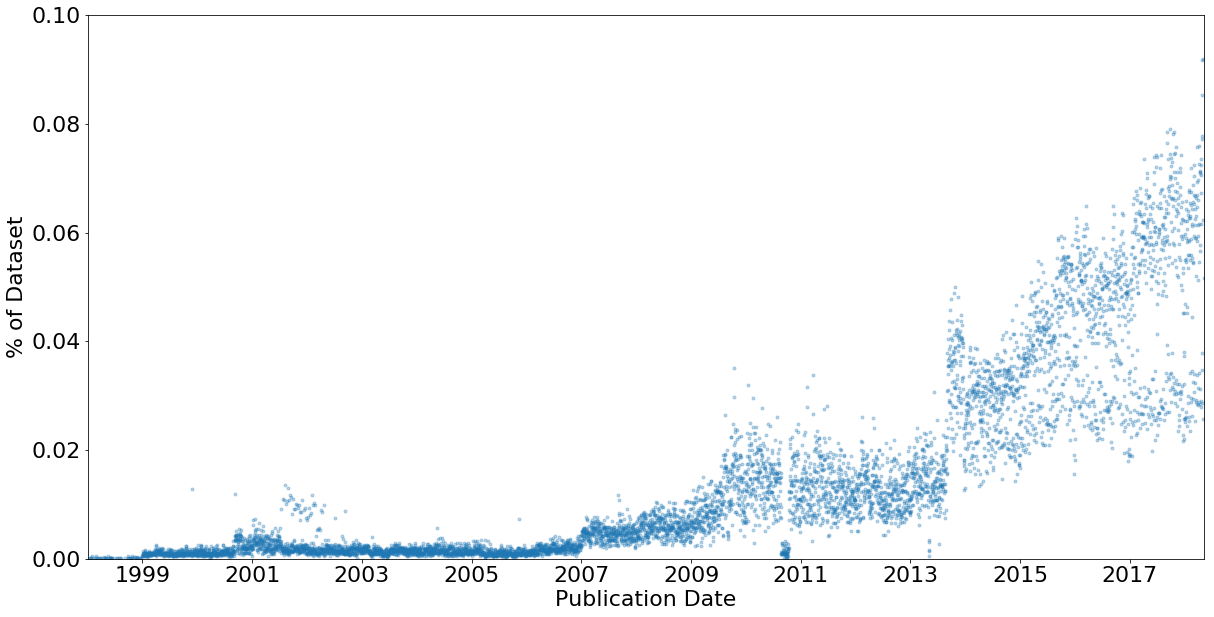

In [61]:
total = merge(tabloid,broadsheet)

def merge(*args):
    # too lazy to use defaultdict ugh so hungry
    x_dict = dict()
    for i in args[0]:
        x_dict[i[0]] = i[1]
    
    for y in args[1:]:
            for i in y:
                if i[0] in x_dict:
                    x_dict[i[0]] = x_dict[i[0]] + i[1]
                else:
                    x_dict[i[0]] = i[1]
    
    return np.array(list(x_dict.items()))

broadsheet = merge(*[get_data(file) for file in ['wapo_datelist.csv','wsj_datelist.csv','nytimes_datelist.csv']])
tabloid = merge(*[get_data(file) for file in ['nypost_datelist.csv','nydailynews_datelist.csv']])

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
for data in [total]:
    print("Max date %s Min date %s" % (str(max(data[:,0])),str(min(data[:,0]))))
    plt.plot(data[:,0],100*data[:,1]/sum(data[:,1]),'.',alpha = 0.3)
    
plt.xlim([datetime.datetime(1998,1,1),datetime.datetime(2018,5,7)])
plt.ylim([0,0.1])
plt.savefig('pubdates_all_axislimited.png')
plt.ylabel('% of Dataset')
plt.xlabel('Publication Date')

In [75]:
post = sum([item[1] for item in total if item[0] > datetime.datetime(2015,5,7)])/sum([item[1] for item in total])

In [76]:
post

0.5077582870925801